In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing required packages
import re
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
# reading the dataset and loading into a dataframe
df = pd.read_csv('../data/cyberbullying_tweets.csv')

# printing the shape: (rows, columns)
display(df.shape)

# first 5 datapoints
display(df.head())

# 5 random samples
display(df.sample(5))

(47692, 2)

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

tweet_text cyberbullying_type
10810  It's just a simple rape joke... racist joke......             gender
46595   No roe u dumb ass nigger who da fuck would F.e.B          ethnicity
9544   RT @EqualityMen: This guy @FeministFailure  is...             gender
6032   RT @TRobinsonNewEra: 12-YEAR-OLD GIRL GANG RAP...  not_cyberbullying
17552  Sir I understand where ur coming from but sayi...           religion

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64


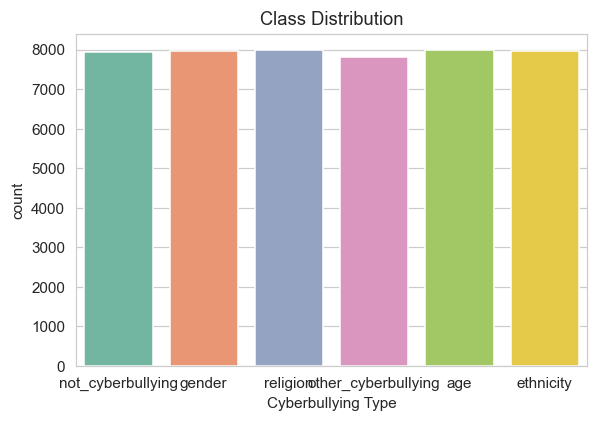

In [4]:
# class distribution
print(df['cyberbullying_type'].value_counts())

# plotting the class distribution
plt.figure(dpi=110)
chart = sns.countplot(x="cyberbullying_type", data=df, palette="Set2")
axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Cyberbullying Type')
plt.show()

In [5]:
# counting null values in the dataset
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [6]:
# splitting into train-validation-test sets (60-20-20)
# performing a random split

# train-test split (80-20)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# train-validation split (80-20)
# 0.8 * 0.25 = 0.2
df_train, df_validation = train_test_split(df, test_size=0.25, random_state=42)

# rest index
df_train.reset_index()
df_test.reset_index()

# size of train-validation-test sets
print('train:',df_train.shape[0])
print('validation:',df_test.shape[0])
print('test:',df_validation.shape[0])

# saving validation set
df_validation.to_csv('../data/validation_data.csv', index=False)

# saving test set
df_test.to_csv('../data/test_data.csv', index=False)

train: 35769
validation: 9539
test: 11923


In [7]:
# spawning a word lemmatizer
lemma = WordNetLemmatizer()

# loading all the english stopwords
stop_words = stopwords.words('english')

# total stopwords
print(len(stop_words))

# first 10 stopwords
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [8]:
## defining the cleaning and preprocessing actions
# converting text to lowercase
# removing links
# coverting text into tokens
# removing stop words
# lemmatizing all words
# removing all words with length less than 3
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+',' ',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemma.lemmatize(w) for w in text]
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

In [9]:
# cleaning and preprocessing the tweet_text column
df_train['clean_tweet'] = df['tweet_text'].apply(clean_text)

display(df_train.loc[:,['tweet_text', 'clean_tweet']].head())

tweet_text  \
44737  Nicole it’s like anything else the buck got pa...   
45366  #bagheera #Maine #coon #black #cat #gatto #gat...   
27550  @Taschanne did bully just wish me happy birthd...   
24989  RT @srhbutts: it looks like #gamergate ethicse...   
4399                                 New books! Yiii! 📖😊   

                                             clean_tweet  
44737  nicole like anything else buck got past obama ...  
45366      bagheera maine coon black cat gatto gato chat  
27550         taschanne bully wish happy birthday maaaad  
24989        srhbutts look like gamergate ethicsed place  
4399                                       new book yiii

In [10]:
# clean training dataset
df_train_cleaned = df_train.loc[:,['clean_tweet', 'cyberbullying_type']]

# saving the cleaned training data
df_train_cleaned.to_csv('../data/train_data.csv', index=False)

display(df_train_cleaned.sample(10))

clean_tweet   cyberbullying_type
30766  lavender blume sexism exists men perpetrator b...  other_cyberbullying
27821  daddybooda big tall head reach pepper head use...  other_cyberbullying
6144             comment taken polygon article rtb panel    not_cyberbullying
27307              hear kjalliancegoa count totem people  other_cyberbullying
41942  hian iamlille racism wen select white clothes ...            ethnicity
44724  chris dangalan never dumb shit life ever fuck ...            ethnicity
21092  banquran huwgruffydd amazing often allah revel...             religion
33651  older people quick say parent hit child enough...                  age
39970  get tweet threatening assassinate nigger dumb ...            ethnicity
42380  way hate fuck america utah must far one worst ...            ethnicity

## WordCloud: Not cyberbullying tweets
----

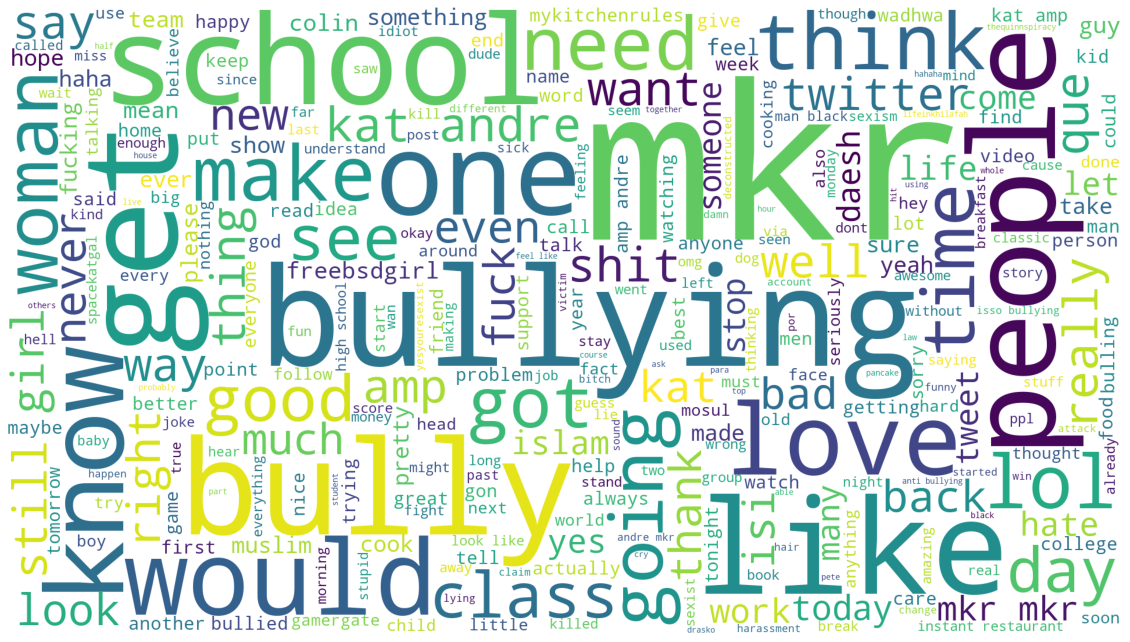

In [11]:
# wordcloud for not_cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'not_cyberbullying'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: All cyberbullying tweets
----

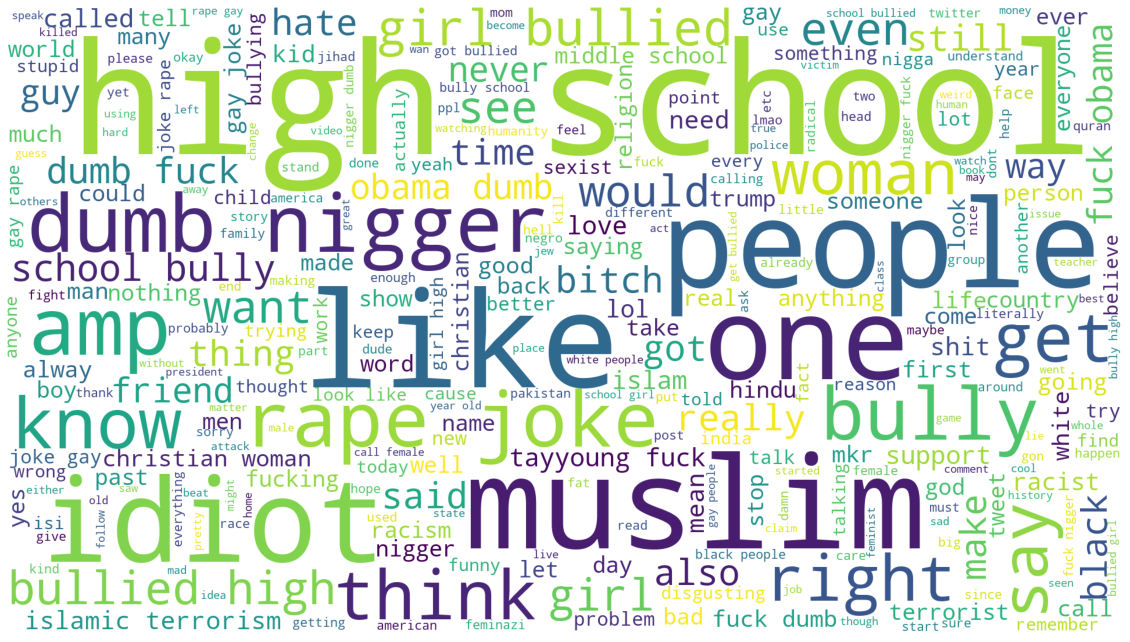

In [12]:
# wordcloud for all cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] != 'not_cyberbullying'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Age cyberbullying tweets
----

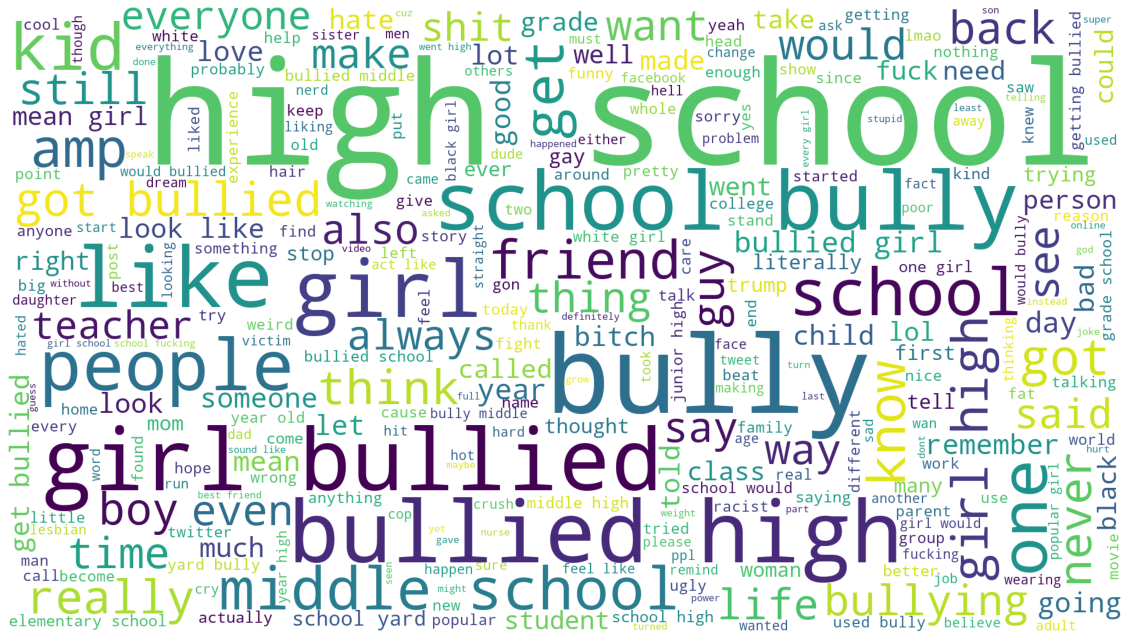

In [13]:
# wordcloud for age cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'age'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Ethnicity cyberbullying tweets
----

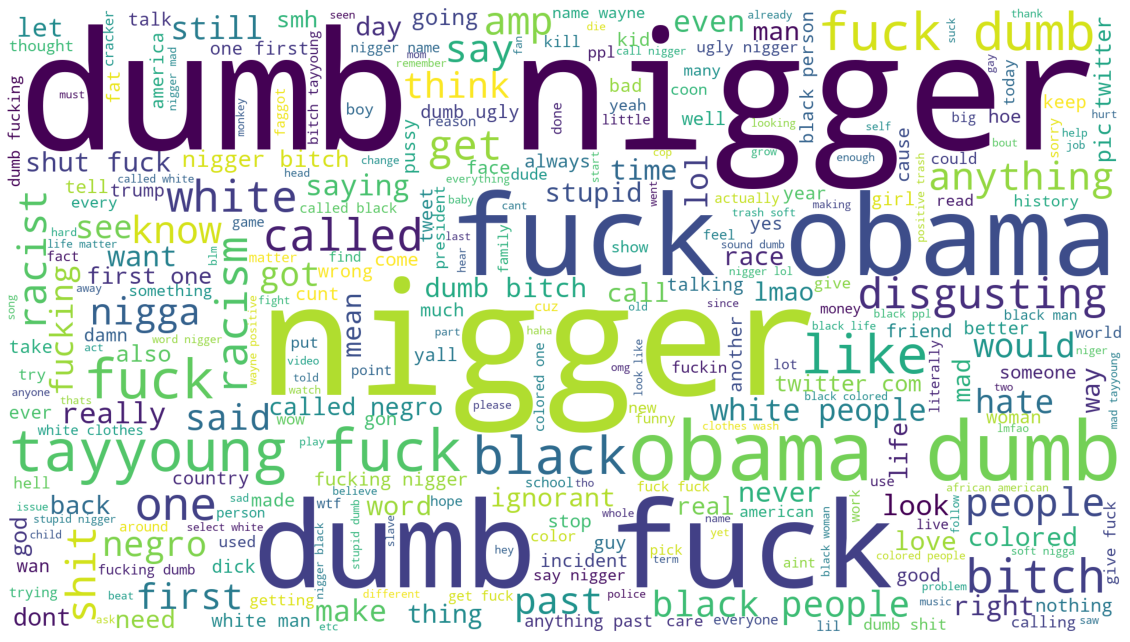

In [14]:
# wordcloud for ethnicity cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'ethnicity'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Gender cyberbullying tweets
----

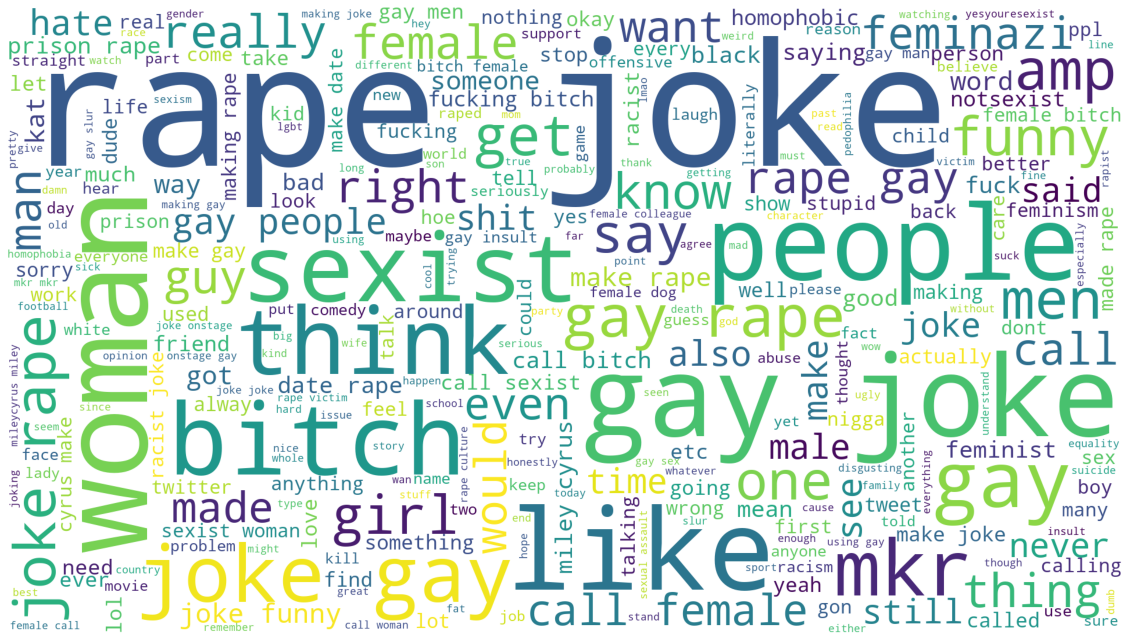

In [15]:
# wordcloud for gender cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'gender'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Religion cyberbullying tweets
----

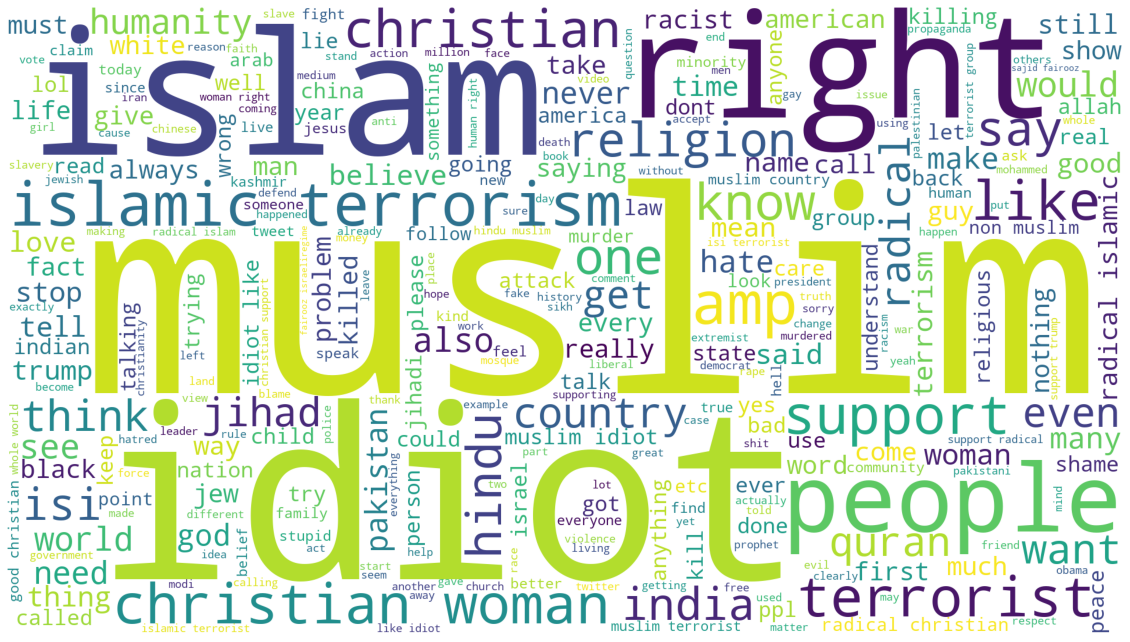

In [16]:
# wordcloud for religion cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'religion'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## WordCloud: Other cyberbullying tweets
----

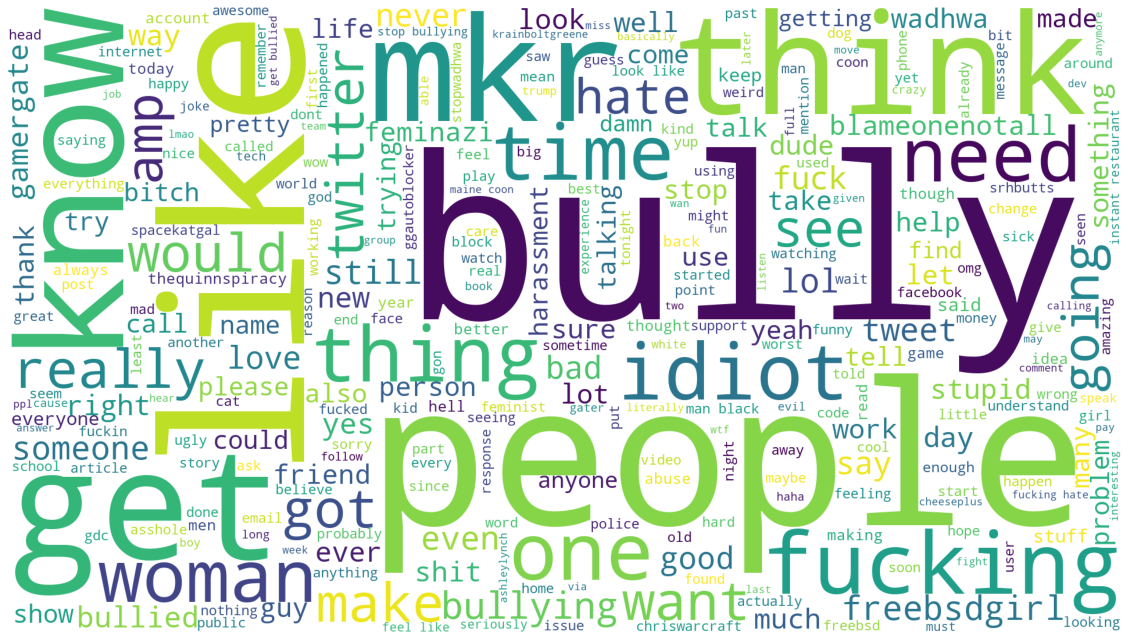

In [17]:
# wordcloud for other cyberbullying tweets
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1920, height=1080, stopwords=stop_words, background_color='white').generate(str(" ".join(df_train[df_train['cyberbullying_type'] == 'other_cyberbullying'].clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()